# Assignment 1
## Supervised learning methods for solving a classification problem

# Understanding the Dataset

In [208]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Reading the csv file using pandas
df = pd.read_csv('dataset_assignment1.csv')

# Counting the number of samples in each class
classSample = df['class'].value_counts()

# Printing the dataset and class sample sizes
print("Dataset\n", df.head())
print("Num Class Samples\n", classSample)

# Splitting dataset into two separate dataframes based on class
# Class 0
df0 = df.loc[df['class'] == 0]
df0_features = df0.iloc[:,:-1]

# Class 1
df1 = df.loc[df['class'] == 1]
df1_features = df1.iloc[:,:-1]

# Computing the statistical descriptions of the dataset
class0Stats = df0_features.describe(include='all')
class1Stats = df1_features.describe(include='all')

print("Class 0 Statistical Descriptions:\n", class0Stats)
print("Class 1 Statistical Descriptions:\n", class1Stats)

Dataset
    feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0         5         1         1         1         2         1         3   
1         5         4         4         5         7        10         3   
2         3         1         1         1         2         2         3   
3         6         8         8         1         3         4         3   
4         4         1         1         3         2         1         3   

   feature8  feature9  class  
0         1         1      0  
1         2         1      0  
2         1         1      0  
3         7         1      0  
4         1         1      0  
Num Class Samples
 0    459
1    241
Name: class, dtype: int64
Class 0 Statistical Descriptions:
          feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.67

## Comparison of Histogram Plots for Full Dataset, Class 0 Dataset, Class 1 Dataset

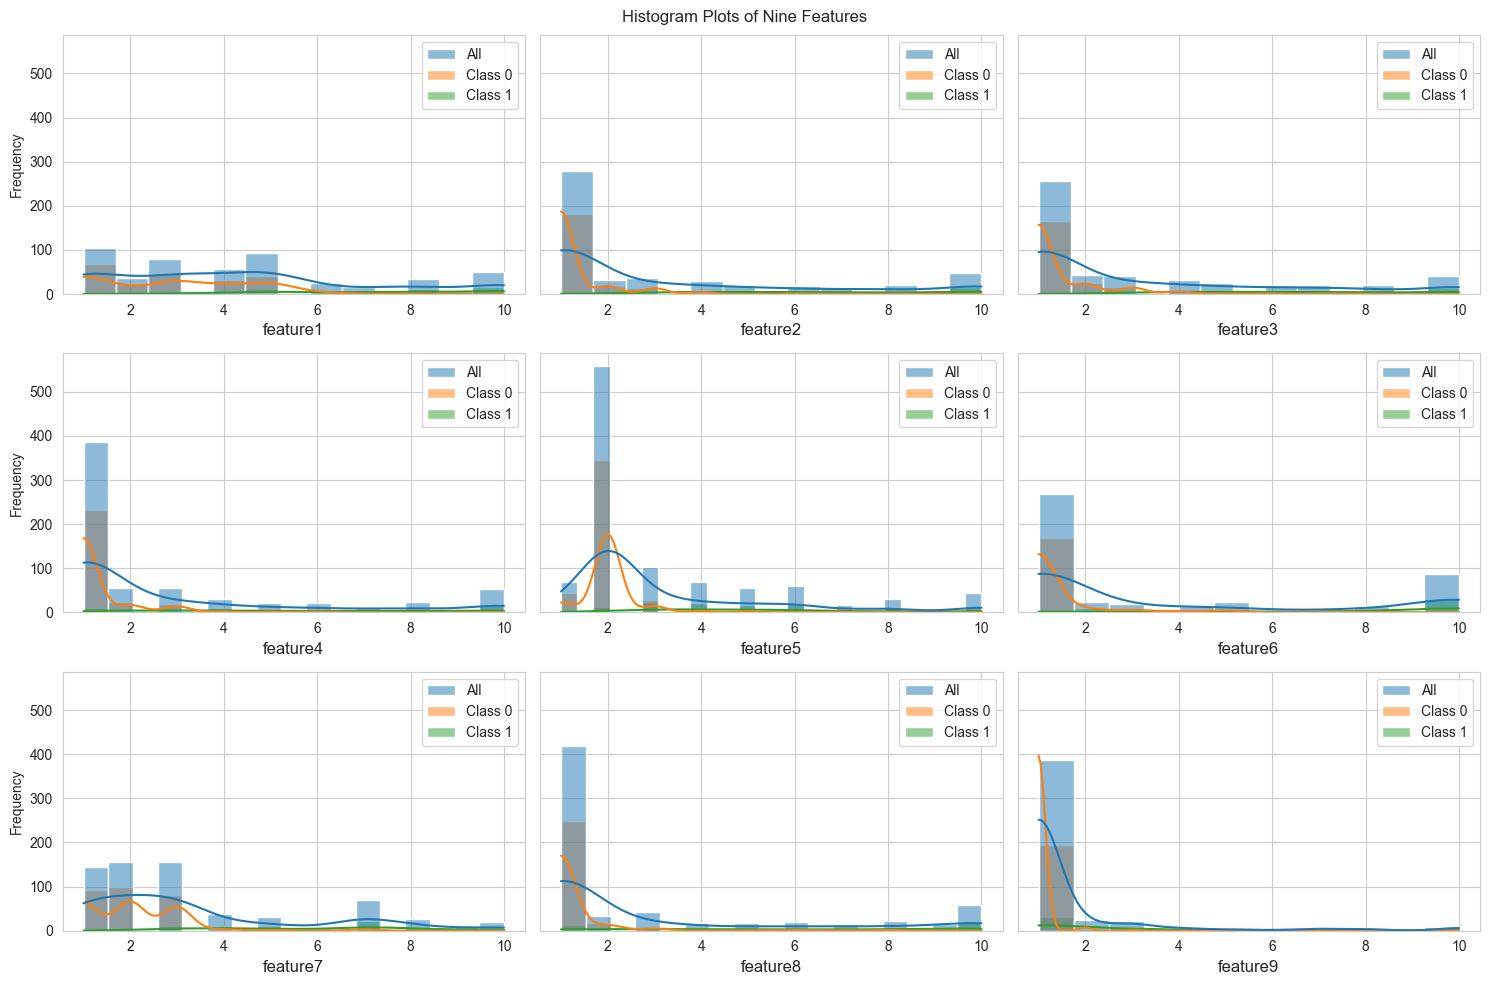

In [209]:
# Getting the names of the features
featureNames = df.columns[0:-1]

# Initialize the plot
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10), sharey=True)
fig.suptitle('Box plots of Features from Combined, Class 0 and Class 1 Datasets')
fig.subplots_adjust(top=0.8, hspace=0.4)

# Loop over the rows of subplots
for row in range(3):
    # Loop over the columns of subplots
    for col in range(3):
        # Get the index of the current subplot
        i = row*3 + col

        # Combine the data for both classes into a single DataFrame
        feature_data = pd.concat([df[featureNames[i]], df0[featureNames[i]], df1[featureNames[i]]], axis=1)
        feature_data.columns = ['All', 'Class 0', 'Class 1']

        # Create a box plot for the feature and add it to the appropriate subplot
        sns.histplot(data=feature_data, kde=True, stat='frequency', ax=axes[row, col])

        # Add x-axis label
        axes[row, col].set_xlabel(featureNames[i], fontsize=12)

# Add a main title to the entire figure
fig.suptitle('Histogram Plots of Nine Features')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

From the image, `feature5` is the dominating feature, with the highest frequency of it appearing in the dataset compared to the other features. Features `2`, `3`, `6` and `feature8, feature 9` have comparable frequency while `feature1` and `feature7` appears the least in the dataset.

## Plotting histogram of individual features in Full Dataset, Class 0 Dataset, Class 1 Dataset

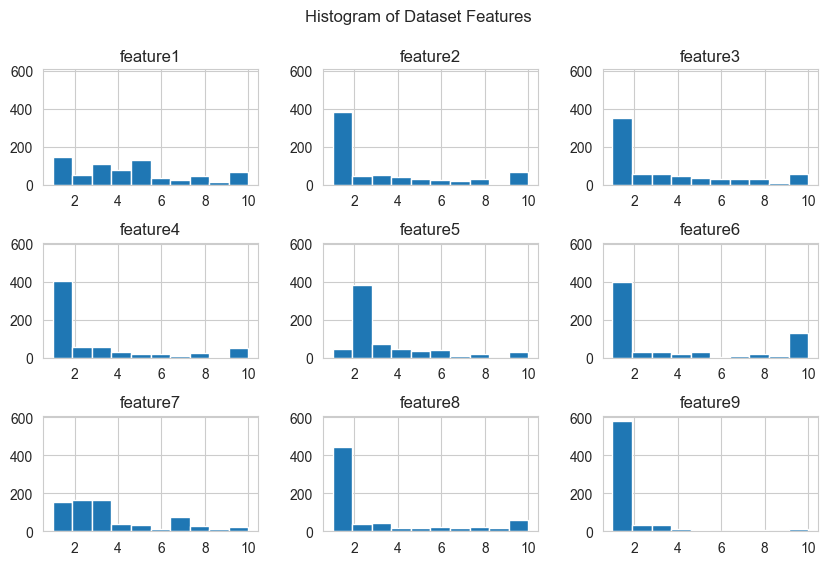

In [210]:
# Histogram of full dataset
y_max = 0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6))

for ax, column in zip(axes.flatten(), df.columns[:-1]):
    ax.hist(df[column], bins=10)
    ax.set_title(column)
    y_max = max(y_max, ax.get_ylim()[1])
fig.suptitle('Histogram of Dataset Features')

# Set common y-axis limit
for ax in axes.flatten():
    ax.set_ylim((0, y_max))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

The image above shows the frequency for each feature from both `Class 0` and `Class 1`. Most of the features tends to have a smaller value as seen with features `2, 3, 4, 5, 6, 8, 9` and only features `1` and `7` have values that are more spread out across the value range of 1 to 10. 

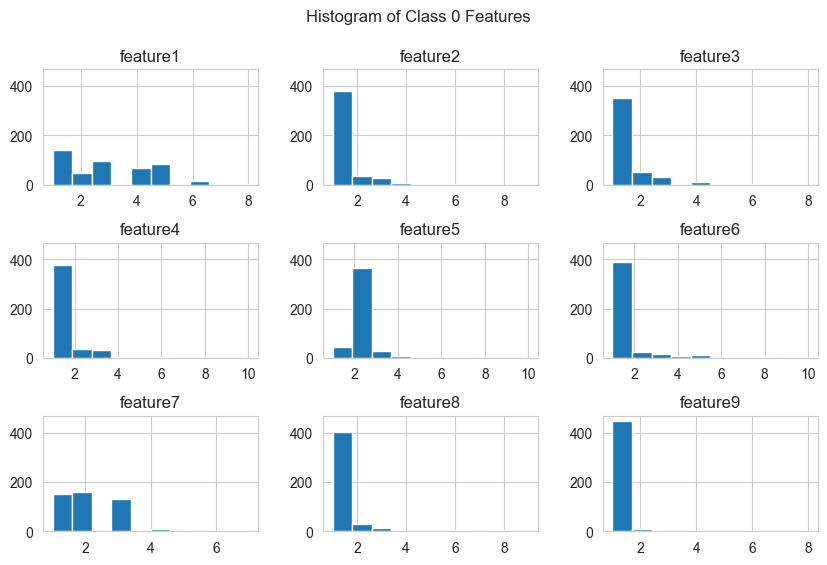

In [211]:
# Histogram Plots Class 0
y_max = 0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
for ax, column in zip(axes.flatten(), df0.columns[:-1]):
    ax.hist(df0[column], bins=10)
    ax.set_title(column)
    y_max = max(y_max, ax.get_ylim()[1])
fig.suptitle('Histogram of Class 0 Features')

# set common y-axis limit
for ax in axes.flatten():
    ax.set_ylim((0, y_max))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

The image above focuses on features that belongs to `Class 0`. Similar observations can be made of the frequency of the feature values being of a smaller value, while `feature1` and `feature7` continues to have a good distribution in feature values from range 1 to 10. 

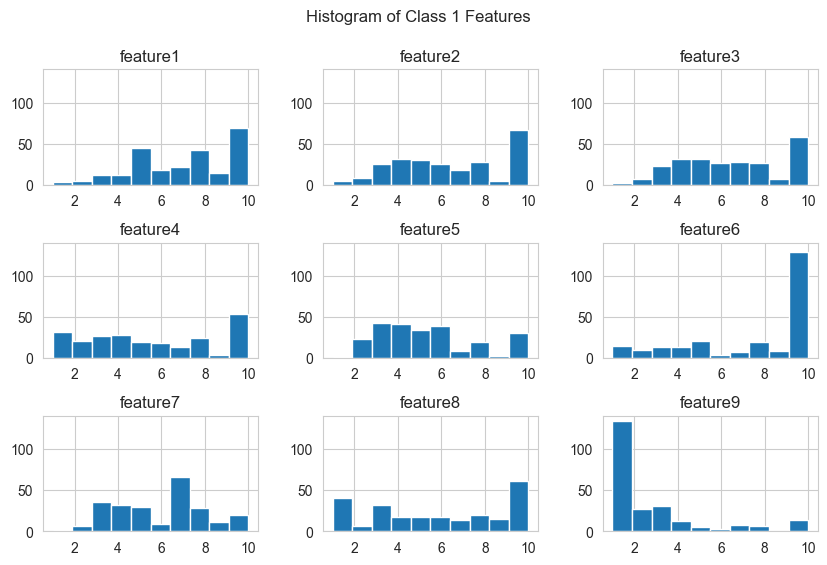

In [212]:
# Histogram Plots Class 1
y_max = 0
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
for ax, column in zip(axes.flatten(), df1.columns[:-1]):
    ax.hist(df1[column], bins=10)
    ax.set_title(column)
    y_max = max(y_max, ax.get_ylim()[1])
fig.suptitle('Histogram of Class 1 Features')

# set common y-axis limit
for ax in axes.flatten():
    ax.set_ylim((0, y_max))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

The features for `Class 1` are better distributed than the features in `Class 0`, except `feature9`. Furthermore, the values of the features tend toward the higher values as seen for `feature2, feature 3, feature 6` and only `feature9` shows the same observation as `Class 0` of having a higher frequency of lower values in the dataset.

## Individual Boxplots for features in Full Dataset, Class 0 Dataset, Class 1 Dataset

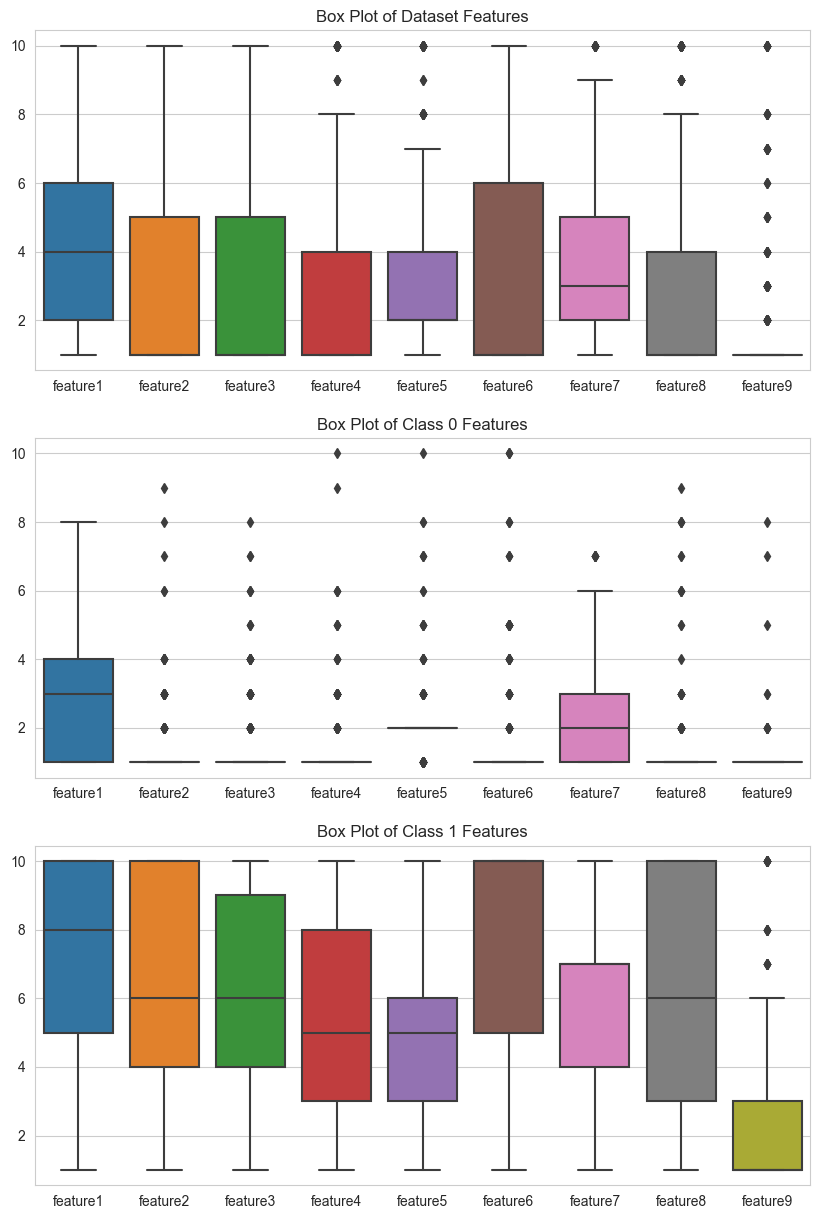

In [213]:
# Plot initialization
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharey=True)
sns.set_style('whitegrid')

# Box Plot of full dataset
fullPlot = sns.boxplot(data=df[df.columns[:-1]], ax = axes[0])
fullPlot.set_title("Box Plot of Dataset Features")

# Box Plot of Class 0 Features
class0Plot = sns.boxplot(data=df0[df0.columns[:-1]],ax = axes[1])
class0Plot.set_title("Box Plot of Class 0 Features")

# Box Plot of Class 1 Features
class1Plot = sns.boxplot(data=df1[df1.columns[:-1]],ax = axes[2])
class1Plot.set_title("Box Plot of Class 1 Features")

plt.show()

The boxplots gives a clearer visualisation of the value distribution of the features for the full dataset, `Class 0` and `Class 1`. Generally, the feature values do tend to distribute towards the lower end of the value range as seen in the first figure showing the boxplot of features of the full dataset. `feature9` has the most outlier values compared to the other features. <br> 

The feature values of `Class 0` has the most sporadic distribution, with many outliers and not following a general distribution, but still tends towards the lower end of the value range. Finally, `Class 1` features are well distributed around the middle to upper range of the value range exccept for `feature9`, with most of the feature values hovering the lower ends of the value range with some outliers in the upper value range. <br>

Using both boxplots and the historgram plots, it can be inferred that the observation of the features in the full dataset plots having a lower feature value is due to the features belonging to `Class 0`. This is also coupled with the fact that `Class 0` have more data samples compared to `Class 1`, 459 vs 241, making the dataset an umbalanced one. Thus, the `Class 0` features dominated the dataset

## Comparison of individual features of Full Dataset, Class 0 Dataset, Class 1 Dataset

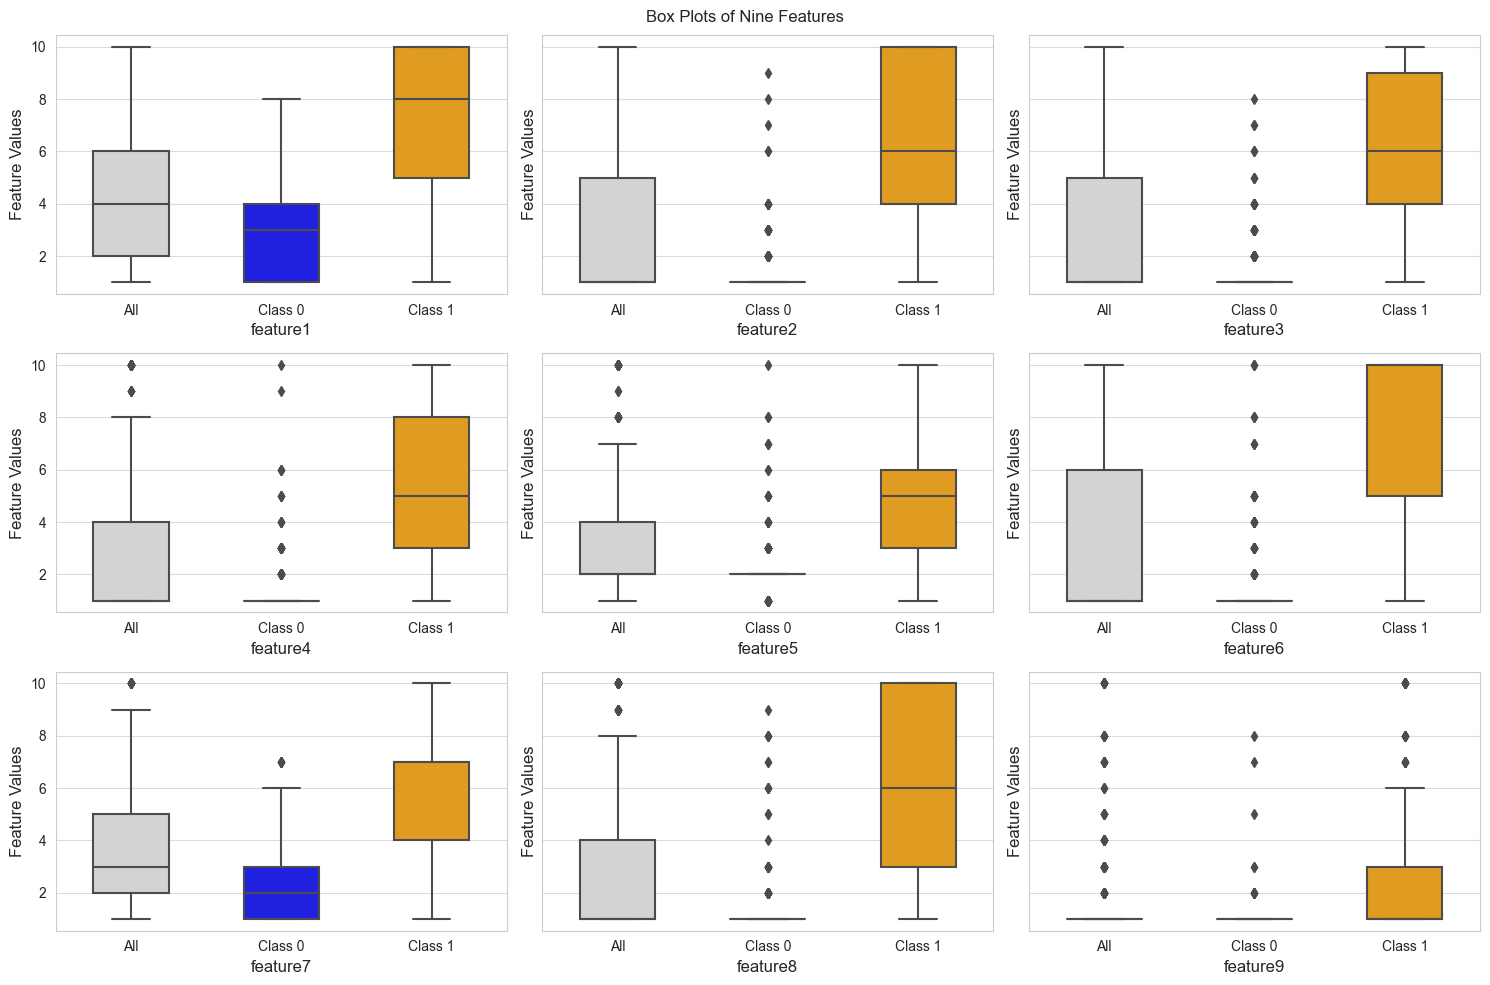

In [214]:
# Initializing the plot
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10), sharey=True)
fig.suptitle('Box plots of Features from Combined, Class 0 and Class 1 Datasets')
fig.subplots_adjust(top=0.8, hspace=0.4)

# Loop over the rows of subplots
for row in range(3):
    # Loop over the columns of subplots
    for col in range(3):
        # Get the index of the current subplot
        i = row*3 + col

        # Combine the data for both classes into a single DataFrame
        feature_data = pd.concat([df[featureNames[i]], df0[featureNames[i]], df1[featureNames[i]]], axis=1)
        feature_data.columns = ['All', 'Class 0', 'Class 1']

        # Create a box plot for the feature and add it to the appropriate subplot
        sns.boxplot(data=feature_data, palette=['lightgray', 'blue', 'orange'], width=0.5, ax=axes[row, col])

        # Add x-axis label
        axes[row, col].set_xlabel(featureNames[i], fontsize=12)

        # Remove y-axis label
        axes[row, col].set_ylabel('')

        # Add y-axis gridlines
        axes[row, col].grid(axis='y', linestyle='-', alpha=0.7)

        # Add a y-axis label and a title
        axes[row, col].set_ylabel('Feature Values', fontsize=12)

# Add a main title to the entire figure
fig.suptitle('Box Plots of Nine Features')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The image above allow us to compare clearly the distribution of the individual features with the label it belongs to. It is shown that `Class 0` feature values are pulling the feature values from `Class 1` down and result in the feature values being in the lower end of the value range in the full dataset. It is interesting to note that both `Class 0` and `Class 1` have features values that range from 1 to 10. <br> <br>
Features `1-8` are good at distinguishing between `Class 0` and `Class 1` as `Class 0` feature values are generally lower than `Class 1` features, with the exception of `feature9`

## Feature Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'feature1'),
  Text(1.5, 0, 'feature2'),
  Text(2.5, 0, 'feature3'),
  Text(3.5, 0, 'feature4'),
  Text(4.5, 0, 'feature5'),
  Text(5.5, 0, 'feature6'),
  Text(6.5, 0, 'feature7'),
  Text(7.5, 0, 'feature8'),
  Text(8.5, 0, 'feature9')])

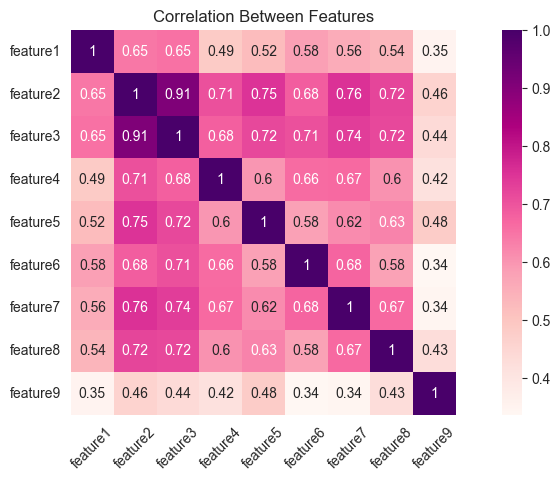

In [215]:
# correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
dfCorr = df.iloc[:,:-1].copy()
featureCorr=dfCorr.corr()

# Plot the heatmap
sns.heatmap(featureCorr,annot=True,cmap='RdPu', square=True)
plt.title('Correlation Between Features')
plt.xticks(rotation=45)

The above image shows the correlation between the features. All the features are positively correlated to each other, with `feature6, feature7` and `feature9` having the lowest correlation score of `0.34` and the highest correlation score is between `feature2` and `feature3` 

# Binary Classifications

## Data Preprocessing and Helper Functions

In [216]:
# Helper Functions
def scoring(true, pred):

    """
    Computing metric scores

    Parameters
    ----------
    true : Array
        List containing true class labels
    pred : Array
        List containing predicted class labels

    Returns
    -------
    precision : float
        The computed precision score of the model
    recall : float
        The computed recall score of the model
    accuracy : float
        The computed accuracy score of the model
    f1 : float
        The computed f1 score of the model
    """

    precision = precision_score(true, pred)*100
    recall = recall_score(true, pred)*100
    accuracy = accuracy_score(true, pred)*100
    f1 = f1_score(true, pred)*100

    return precision, recall, accuracy, f1

def visualizer(metric, y_pred_train, y_train, y_test, y_pred_test, model):

    """
    Confusion matrix visualizer of the training dataset and testing dataset

    Parameters
    ----------
    metric : String
        The metric used as a scoring method in cross-validation
    y_pred_train : Array
        List containing predicted class labels on training dataset
    y_pred : Array
        List containing true class labels in training dataset
    y_test : Array
        List containing true class labels in testing dataset
    y_pred_test : Array
        List containing predicted class labels on testing dataset
    model : Object
        The trained classifier model

    Returns
    -------
    Nothing
    """

    # Resets previous plots
    sns.reset_orig()

    # Initialise polts
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle("Confusion Matrix Metric {}".format(metric.capitalize()))

    cm1 = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
    disp1.plot(ax=ax[0])
    ax[0].set_title("Training Set")

    # Testing confusion matrix
    cm2 = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
    disp2.plot(ax=ax[1])
    ax[1].set_title("Testing Set")

    plt.show()
df = pd.read_csv('dataset_assignment1.csv')
# Data Preprocessing
# Split the dataset into features and labels
X = df.drop('class', axis=1).values
y = df['class'].values

# Split the dataset into training and testing sets
# X = features, y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cross validation scoring metrics
evametricList = ['precision', 'recall', 'accuracy', 'f1']
modelList = ['precisionModel', 'recallModel', 'accuracyModel', 'f1Model']

## KNN Classifier

In [217]:
# Tunning Hyperparameters
param_grid = {'n_neighbors': list(range(1, 20)),
                'metric': ['euclidean', 'manhattan']}

metricData = {}

# Tunning Hyperparameters for different scoring metric
for evametric in evametricList:
    print("Executing metric:", evametric)
    print('----------')

    scores = []
    knn0 = KNeighborsClassifier()

    # Gridsearch cross validation hyperparameter tunning
    grid = GridSearchCV(knn0, param_grid, cv=5, scoring=evametric, return_train_score=False)

    # Fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    # Getting the best parameters
    best_param = grid_search.best_params_
    best_k = best_param['n_neighbors']
    best_metric = best_param['metric']

    print("Best_k:", best_k)
    print("Best_metric:", best_metric)

    # Train using the best hyperparameters
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
    knn.fit(X_train, y_train)

    # Predict the target variable for the test dataset
    y_pred = knn.predict(X_train)

    # Evaluation
    precision, recall, accuracy, f1 = scoring(y_train, y_pred)

    # Storing the evaluation scores
    scores.extend((precision, recall, accuracy, f1, knn, y_pred))
    metricData[evametric] = scores
    print('==========')

# Presenting table of metric values for each metric evaluations
print("Consolidated Metric Evaluation Scores")
metricdf = [[metricData[key][i] for i in range(4)] for key in metricData]
metricdf = pd.DataFrame(metricdf , index=modelList, columns=evametricList)

print(metricdf)

Executing metric: precision
----------
Best_k: 12
Best_metric: manhattan
Executing metric: recall
----------
Best_k: 5
Best_metric: euclidean
Executing metric: accuracy
----------
Best_k: 5
Best_metric: euclidean
Executing metric: f1
----------
Best_k: 5
Best_metric: euclidean
Consolidated Metric Evaluation Scores
                precision     recall   accuracy         f1
precisionModel  96.216216  95.187166  97.142857  95.698925
recallModel     94.791667  97.326203  97.321429  96.042216
accuracyModel   94.791667  97.326203  97.321429  96.042216
f1Model         94.791667  97.326203  97.321429  96.042216


The `best_param` obtained for running `precision` as the evaluation metric is different from the other 3 evaluation metrics in `GridSearchCV`. <br> 
This is reflected in the data above, where `recallModel`, `accuracyModel`, `f1Model` all have the same `precision`, `recall`, `accuracy` and `f1` scores whereas `precisionModel` have different scores. <br> 
Moving forward, 2 models will be used, the `precisionModel` and `recallModel`

### KNN Model Testing Evaluation

Testing precisionmodel
            precision     recall   accuracy         f1
Training    96.216216  95.187166  97.142857  95.698925
Testing     94.230769  90.740741  94.285714  92.452830
Difference   1.985447   4.446425   2.857143   3.246095


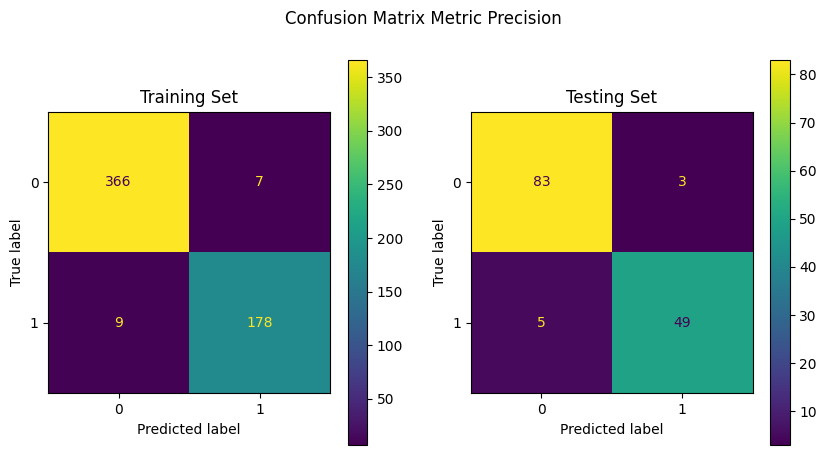

Testing recallmodel
            precision     recall   accuracy         f1
Training    94.791667  97.326203  97.321429  96.042216
Testing     94.545455  96.296296  96.428571  95.412844
Difference   0.246212   1.029907   0.892857   0.629372


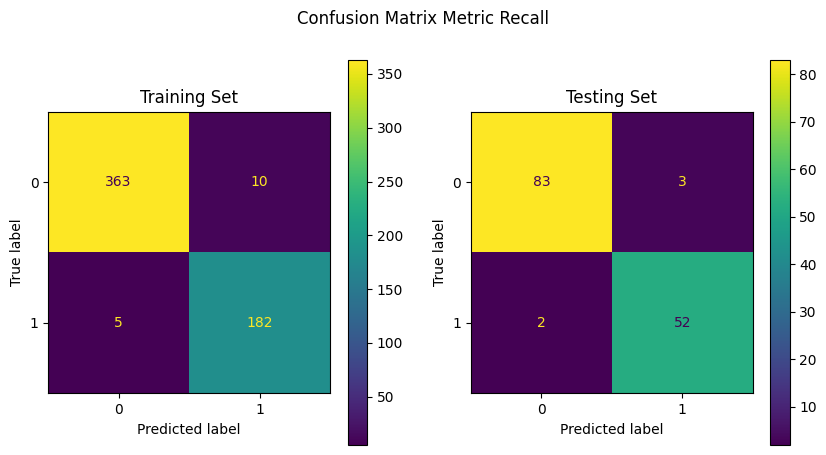

In [218]:
shortList = ['precision', 'recall']
shortlistModels = ['precisionModel', 'recallModel']

i = 0

for metric in shortList:
    # Retriving the model and its results
    model = metricData.get(metric)[-2]
    y_pred_train = metricData.get(metric)[-1]

    print("Testing {}model".format(metric))

    # Testing the model on testing dataset
    y_pred_test=model.predict(X_test)

    # Evaluate the testing
    precisionTest, recallTest, accuracyTest, f1Test = scoring(y_test, y_pred_test)

    # Storing the testing scores
    testScore = []
    testScore.extend((precisionTest,recallTest,accuracyTest,f1Test))

    # Presenting train vs test scores
    finaldf = pd.DataFrame([list(metricdf.loc[shortlistModels[i]]), testScore], columns=metricdf.columns)
    finaldf.index = ["Training", "Testing"]
    finaldf.loc['Difference'] = finaldf.iloc[0] - finaldf.iloc[1]
    print(finaldf)

    # Visualisation of results
    visualizer(metric, y_pred_train, y_train, y_test, y_pred_test, model)

    i += 1

Although `precisionModel` had the highest training precision score, its testing precision score is lower than `recallModel`. For the testing score of recall, accuracy and F1-score, `recallModel` continue to outperform `precisionModel` in results. Furthermore, the difference between the testing and training scores are lower for `recallModel` compared to `precisionModel`, which indicates that `recallModel` generalizes well to new data. Hence, `recallModel` will be the better KNN model in classifying the dataset <br> <br>
The lower false positive rate in the testing dataset suggests that `recallModel`'s performance improved on new data. As such, `recallModel` has a better performance compared to `precisionModel`.

## Random Forest Classifer

In [219]:
# Tunning Hyperparameters
param_grid = {
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

metricData = {}

for evametric in evametricList:
    scores = []
    print("Evaluation metric:", evametric)
    rfc0 = RandomForestClassifier(random_state=3)

    # Gridsearch cross validation hyperparameter tunning
    grid = GridSearchCV(rfc0, param_grid, cv=5, scoring=evametric, return_train_score=False, verbose=1)

    # Fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    # Getting the best parameters
    best_param = grid_search.best_params_
    best_estimator = best_param['n_estimators']
    best_max_depth = best_param['max_depth']
    best_criterion = best_param['criterion']

    print("best_estimator:", best_estimator)
    print("best_max_depth", best_max_depth)
    print("best_criterion", best_criterion)

    # Train using the best hyperparameters
    rfc=RandomForestClassifier(random_state=3, n_estimators= best_estimator,
                            max_depth=best_max_depth, criterion=best_criterion)
    rfc.fit(X_train, y_train)

    # Predict the target variable for the test dataset
    y_pred = rfc.predict(X_train)

    # Evaluation
    precision, recall, accuracy, f1 = scoring(y_train, y_pred)

    # Storing the evaluation scores
    scores.extend((precision, recall, accuracy, f1, rfc, y_pred))
    metricData[evametric] = scores
    print('==========')

# Presenting table of metric values for each metric evaluations
print("Consolidated Metric Evaluation Scores")
metricdf = [[metricData[key][i] for i in range(4)] for key in metricData]
metricdf = pd.DataFrame(metricdf , index=modelList, columns=evametricList)

print(metricdf)

Evaluation metric: precision
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_estimator: 200
best_max_depth 4
best_criterion gini
Evaluation metric: recall
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_estimator: 500
best_max_depth 4
best_criterion entropy
Evaluation metric: accuracy
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_estimator: 200
best_max_depth 4
best_criterion gini
Evaluation metric: f1
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_estimator: 200
best_max_depth 5
best_criterion gini
Consolidated Metric Evaluation Scores
                precision      recall   accuracy         f1
precisionModel  95.384615   99.465241  98.214286  97.382199
recallModel     95.408163  100.000000  98.392857  97.650131
accuracyModel   95.384615   99.465241  98.214286  97.382199
f1Model         95.897436  100.000000  98.571429  97.905759


Based on the `best_param` obtained from running the 4 evaluation metric, 4 different hyperparameters are obtained with different `precision`, `recall`, `accuracy` and `f1` scores <br>
Lookking at the scores, the `f1Model` is the only model that performs the best for all evaluation metrics. Hence, this model will be used on the testing dataset

### Random Forest Testing Evaluation

Testing f1model
            precision      recall   accuracy         f1
Training    95.897436  100.000000  98.571429  97.905759
Testing     91.071429   94.444444  94.285714  92.727273
Difference   4.826007    5.555556   4.285714   5.178486


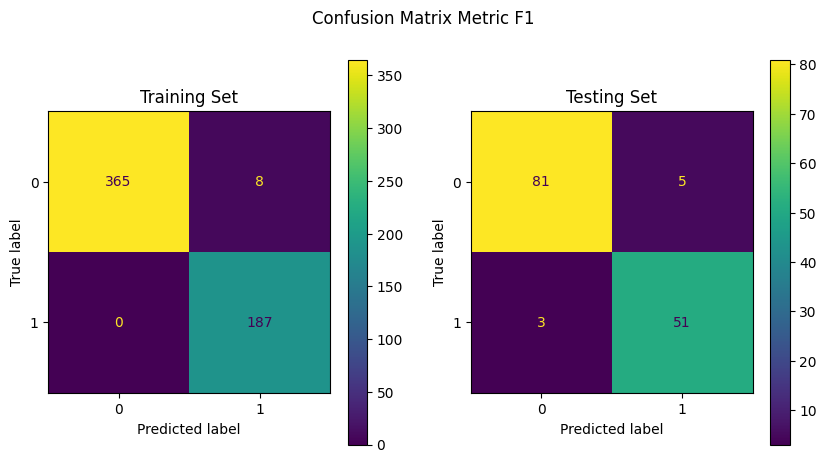

In [220]:
# Model with scoring metric tested
metric = 'f1'

# Retriving the model and its results
model = metricData.get(metric)[-2]
y_pred_train = metricData.get(metric)[-1]

print("Testing {}model".format(metric))

# Testing the model on testing dataset
y_pred_test=model.predict(X_test)

# Evaluate the testing
precisionTest, recallTest, accuracyTest, f1Test = scoring(y_test, y_pred_test)

# Storing the testing scores
testScore = []
testScore.extend((precisionTest,recallTest,accuracyTest,f1Test))

# Presenting train vs test scores
finaldf = pd.DataFrame([list(metricdf.loc['f1Model']), testScore], columns=metricdf.columns)
finaldf.index = ["Training", "Testing"]
finaldf.loc['Difference'] = finaldf.iloc[0] - finaldf.iloc[1]
print(finaldf)

# Visualisation of results
visualizer(metric, y_pred_train, y_train, y_test, y_pred_test, model)

`f1model` has a slightly higher false positive rate and a small number of false negative predictions, suggesting in a slight decrease in model performance. This could be due to overfitting, where the model has learned to recognize the specific patterns in the training data and is not able to generalize to new data

## Logistic Regression Classifier

In [221]:
# Tunning Hyperparameters
param_grid={"C": np.logspace(-3,3,7),
            "penalty":['l1','l1']}

metricData = {}

# Tunning Hyperparameters for different scoring metric
for evametric in evametricList:
    print("Executing metric:", evametric)
    print('----------')

    scores = []
    logreg0 = LogisticRegression(solver='liblinear')

    # Gridsearch cross validation hyperparameter tunning
    grid = GridSearchCV(logreg0, param_grid,cv=5, scoring=evametric, return_train_score=False)

    # Fitting the model for grid search
    grid_search = grid.fit(X_train,y_train)

    # Getting the best parameters
    best_param = grid_search.best_params_
    best_C = best_param['C']
    best_penalty = best_param['penalty']

    print("best_C:", best_C)
    print("best_penalty:", best_penalty)

    # Train using the best hyperparameters
    logreg = LogisticRegression(random_state=42, C = best_C, penalty=best_penalty, solver='liblinear')
    logreg.fit(X_train, y_train)

    # Predict the target variable for the test dataset
    y_pred = logreg.predict(X_train)

    # Evaluation
    precision, recall, accuracy, f1 = scoring(y_train, y_pred)

    # Storing the evaluation scores
    scores.extend((precision, recall, accuracy, f1, logreg, y_pred))
    metricData[evametric] = scores
    print('==========')

# Presenting table of metric values for each metric evaluations
print("Consolidated Metric Evaluation Scores")
metricdf = [[metricData[key][i] for i in range(4)] for key in metricData]
metricdf = pd.DataFrame(metricdf , index=modelList, columns=evametricList)

print(metricdf)

Executing metric: precision
----------
best_C: 0.1
best_penalty: l1
Executing metric: recall
----------
best_C: 0.01
best_penalty: l1
Executing metric: accuracy
----------
best_C: 1.0
best_penalty: l1
Executing metric: f1
----------
best_C: 1.0
best_penalty: l1
Consolidated Metric Evaluation Scores
                precision     recall   accuracy         f1
precisionModel  96.132597  93.048128  96.428571  94.565217
recallModel     89.108911  96.256684  94.821429  92.544987
accuracyModel   95.212766  95.721925  96.964286  95.466667
f1Model         95.212766  95.721925  96.964286  95.466667


Running 4 evaluation metrics in `GridSearchCV` returns `precisionModel` having the highest precision, `recallModel` has the highest recall and `accuracyModel` and `f1Model` has the highest accuracy and F1-score. <br>
Thus, hyperparameters for `precisionModel`: `C=0.1`, `penalty=l1` ; `recallModel`: `C=0.01`, `penalty=l1` ; `accuracyModel`: `C=1.0`, `penalty=l1` will be used for evaluation on the testing dataset

### Logistic Regression Testing Evaluation

Testing precisionmodel
            precision     recall   accuracy         f1
Training    96.132597  93.048128  96.428571  94.565217
Testing     92.592593  92.592593  94.285714  92.592593
Difference   3.540004   0.455536   2.142857   1.972625


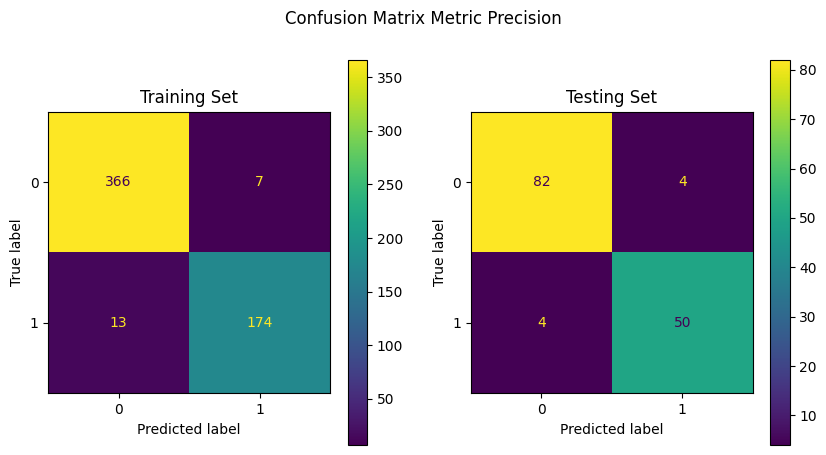

Testing recallmodel
            precision     recall   accuracy         f1
Training    89.108911  96.256684  94.821429  92.544987
Testing     89.830508  98.148148  95.000000  93.805310
Difference  -0.721598  -1.891464  -0.178571  -1.260323


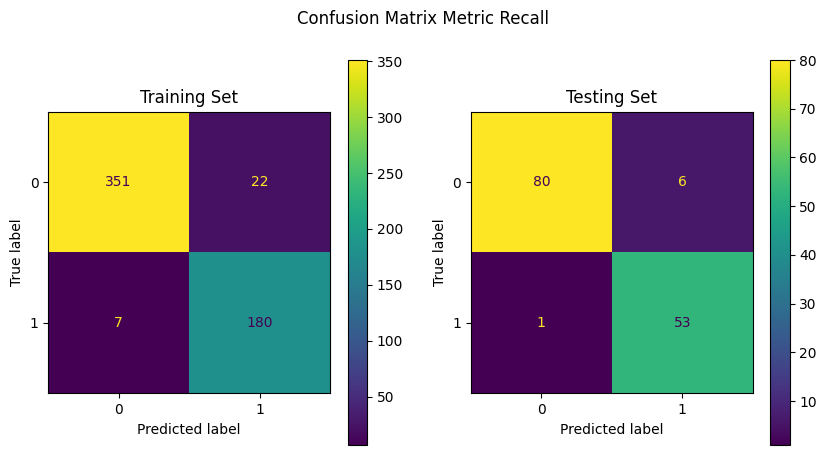

Testing accuracymodel
            precision     recall   accuracy         f1
Training    95.212766  95.721925  96.964286  95.466667
Testing     94.545455  96.296296  96.428571  95.412844
Difference   0.667311  -0.574371   0.535714   0.053823


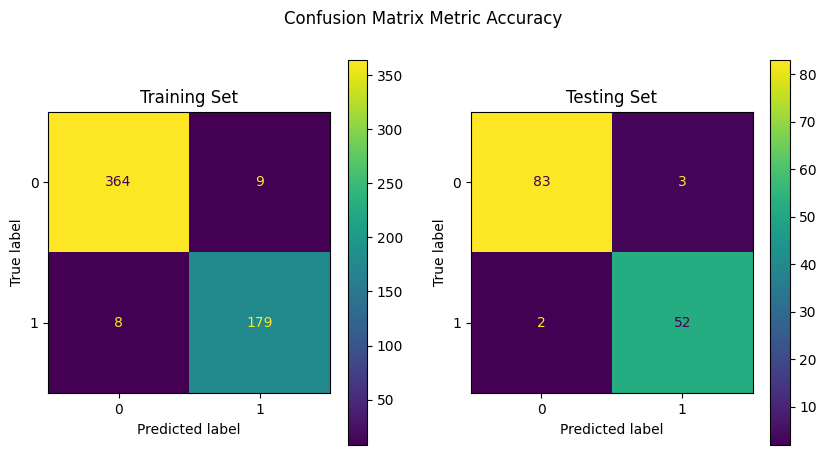

In [222]:
shortList = ['precision', 'recall', 'accuracy']
shortlistModels = ['precisionModel', 'recallModel', 'accuracyModel']

i = 0

for metric in shortList:
    # Retriving the model and its results
    model = metricData.get(metric)[-2]
    y_pred_train = metricData.get(metric)[-1]

    print("Testing {}model".format(metric))

    # Testing the model on testing dataset
    y_pred_test=model.predict(X_test)

    # Evaluate the testing
    precisionTest, recallTest, accuracyTest, f1Test = scoring(y_test, y_pred_test)

    # Storing the testing scores
    testScore = []
    testScore.extend((precisionTest,recallTest,accuracyTest,f1Test))

    # Presenting train vs test scores
    finaldf = pd.DataFrame([list(metricdf.loc[shortlistModels[i]]), testScore], columns=metricdf.columns)
    finaldf.index = ["Training", "Testing"]
    finaldf.loc['Difference'] = finaldf.iloc[0] - finaldf.iloc[1]
    print(finaldf)

    # Visualisation of results
    visualizer(metric, y_pred_train, y_train, y_test, y_pred_test, model)

    i+=1

`precisionModel` and `recallModel` which had the highest precision and recall score on the training dataset respectively was outperformed by `accuracyModel` in those metrics. `accuracyModel`’s testing precision score and recall score is higher than `precisionModel` and `recallModel` by 1.95% and 0.0396% respectively. `accuracyModel` continues to have the highest testing accuracy and F1-Score amongst the models. Overall, `recallModel` and `accuracyModel` generalizes well as it has a small difference between the training and testing scores. <br><br>
Despite `accuracyModel` performing better than `precisionModel` and 2, the confusion matrix suggest that all the models still have room for improvement in reducing the false positive and false negatives as each of the models have comparable performances on the training and testing datasets.
